In [29]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(style="white", color_codes=True)
from sklearn.datasets import load_iris

In [7]:
iris = load_iris()

In [23]:
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [9]:
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)

In [10]:
df.head

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [12]:
df['species'] = iris.target_names[iris.target]

In [19]:
df.sample(20)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
79,5.7,2.6,3.5,1.0,versicolor
39,5.1,3.4,1.5,0.2,setosa
99,5.7,2.8,4.1,1.3,versicolor
61,5.9,3.0,4.2,1.5,versicolor
33,5.5,4.2,1.4,0.2,setosa
29,4.7,3.2,1.6,0.2,setosa
49,5.0,3.3,1.4,0.2,setosa
10,5.4,3.7,1.5,0.2,setosa
127,6.1,3.0,4.9,1.8,virginica
102,7.1,3.0,5.9,2.1,virginica


In [15]:
df['species'].value_counts()

setosa        50
versicolor    50
virginica     50
Name: species, dtype: int64

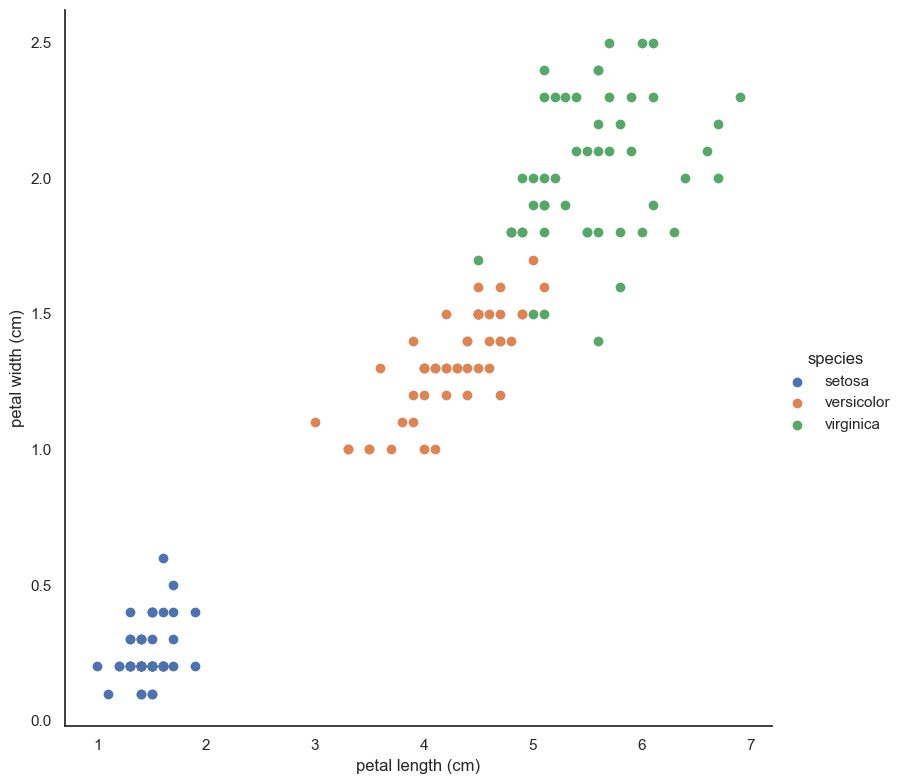

In [16]:
sns.FacetGrid(df, hue="species",height=8).map(plt.scatter, "petal length (cm)", "petal width (cm)").add_legend()

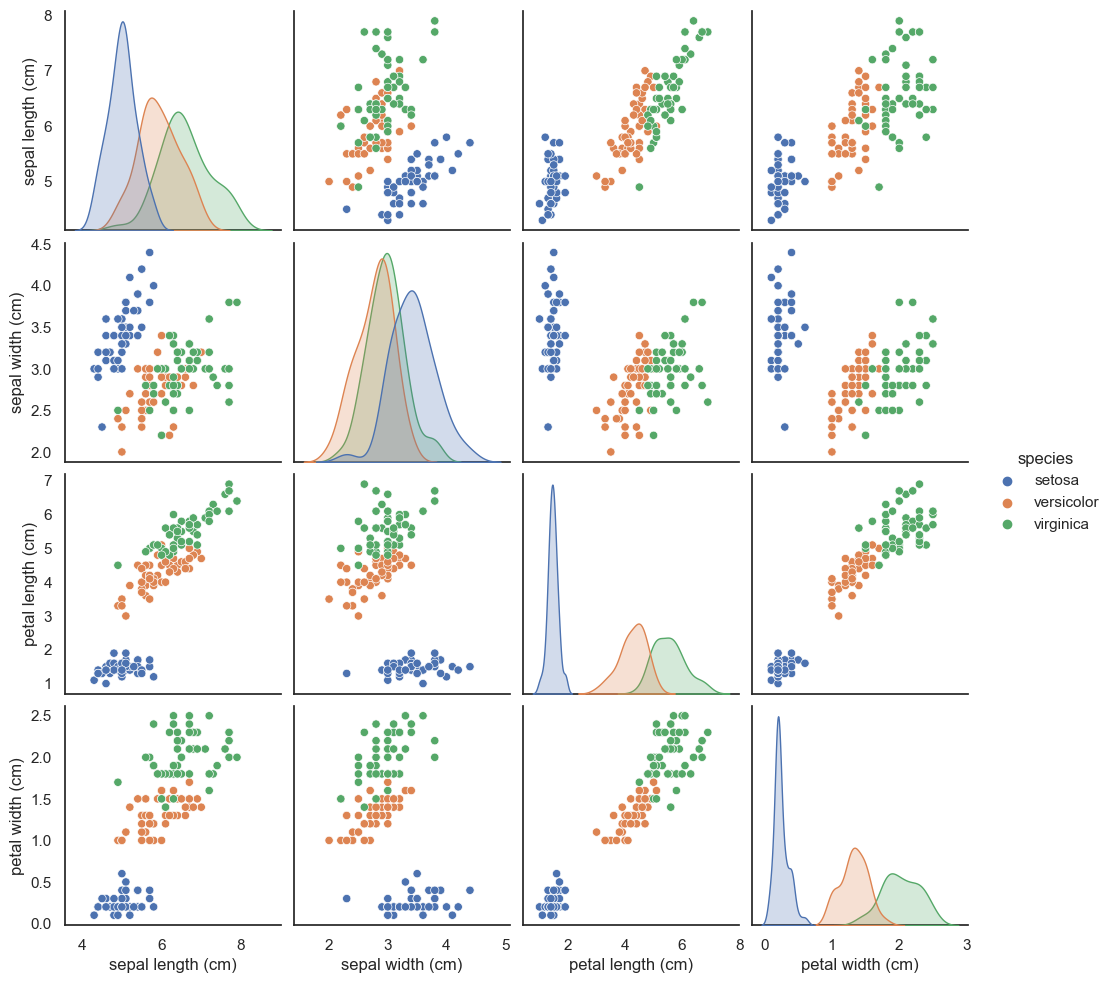

In [35]:
sns.pairplot(df,hue="species")
plt.show()

In [17]:
from sklearn import svm
model = svm.SVC(kernel='linear', C=0.1)
model.fit(iris.data, iris.target)

SVC(C=0.1, kernel='linear')

In [18]:
model.score(iris.data, iris.target)

0.9666666666666667

In [20]:
expected = iris.target
predicted = model.predict(iris.data)

In [24]:
from sklearn import metrics

print(metrics.classification_report(expected, predicted))
print(metrics.confusion_matrix(expected, predicted))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       0.94      0.96      0.95        50
           2       0.96      0.94      0.95        50

    accuracy                           0.97       150
   macro avg       0.97      0.97      0.97       150
weighted avg       0.97      0.97      0.97       150

[[50  0  0]
 [ 0 48  2]
 [ 0  3 47]]


other parameters

In [25]:
X = iris.data[:, :2] # we only take the first two features.
y = iris.target

In [30]:
def MySVMClassifier( my_kernel, my_C, my_gamma):
    
    svc = svm.SVC(kernel=my_kernel, C=my_C,gamma=my_gamma)
    svc.fit(X, y)
    
    h=0.02
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),np.arange(y_min, y_max, h))
 
    plt.subplot(1, 1, 1)
    Z = svc.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.8)
    plt.scatter(X[:, 0], X[:, 1], c=y)
    plt.xlabel('Sepal length')
    plt.ylabel('Sepal width')
    plt.xlim(xx.min(), xx.max())
    plt.show() 
    

In [31]:
from ipywidgets import interact

In [32]:
i = interact(MySVMClassifier, my_kernel=['linear','rbf'],my_C=(0.001,10), my_gamma=(1,100))

interactive(children=(Dropdown(description='my_kernel', options=('linear', 'rbf'), value='linear'), FloatSlide…